#### This notebook is primarily for making the various plots present in this paper. Each plot is explained as required.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams["font.family"]="serif"
%matplotlib inline
import sys
from helperfn.utils import *
import sunpy.cm 

In [2]:
import cv2
from scipy.ndimage import laplace
import datetime

## NOTE: Make sure your paths are correct
I have made the paths pointing to `../GapFillingData/` which was where my data was present. Modify this appropriately for your data.

In [4]:
base='../GapFillingData/'

### First plot: Data

First, we plot the 211 and 193. We plot 10 days of data for both

(20, 15)
(20, 256, 256)


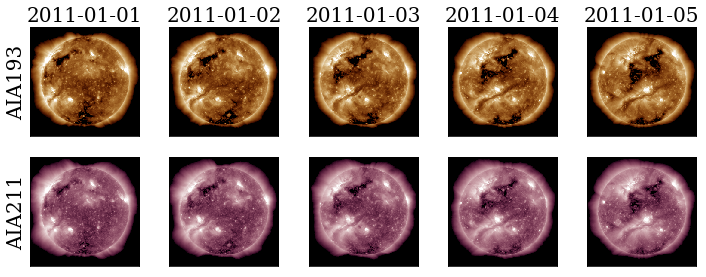

In [5]:
#Load data first. Any data would do.
path193 = base+'Data/CrossValidation193/CV_1/Test/Partition1.npy'
path211 = base+'Data/CrossValidation211/CV_1/Train/Partition1.npy'
AIA193=np.load(path193,allow_pickle=True).tolist()
AIA211=np.load(path211,allow_pickle=True).tolist()
print AIA193['output'].shape
print AIA211['input'].shape
#First the aia images.
Nimg=5
rowind=['AIA193','AIA211']
fig, axes = plt.subplots( figsize=(10, 4) , nrows=2, ncols=Nimg, sharey=True) 
#axes[0,4].set_title('AIA Imagery data over 10 consecutive days of observation',fontsize=25)
for ax,i in zip(axes[:,0],xrange(2)):
    ax.set_ylabel(rowind[i],rotation=90,size=20)
tmp=AIA193['output']
for ax,i in zip(axes[0,:],xrange(Nimg)):
    dt=datetime.datetime(int(tmp[i,0]),1,1)+datetime.timedelta(int(tmp[i,1])-1)
    ax.set_title(dt.date(),size=20)
for ax,i in zip(axes[0,:],xrange(Nimg)):
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(AIA193['input'][i,:],origin='lower',cmap='sdoaia193')
for ax,i in zip(axes[1,:],xrange(Nimg)):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(AIA211['input'][i,:],origin='lower',cmap='sdoaia211')
    ax.grid(False)
plt.tight_layout()
#plt.savefig('Plots/AIA_image_data.eps',fmt='eps',dpi=500)
#plt.savefig('Plots/AIA_image_data.pdf',fmt='pdf',dpi=300)

(20, 15)
(20, 256, 256)


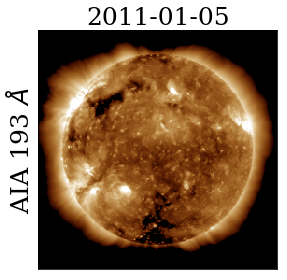

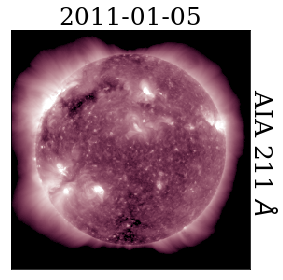

In [6]:
#Single image 
#Load data first. Any data would do.
path193 = base+'Data/CrossValidation193/CV_1/Test/Partition1.npy'
path211 = base+'Data/CrossValidation211/CV_1/Train/Partition1.npy'
AIA193=np.load(path193,allow_pickle=True).tolist()
AIA211=np.load(path211,allow_pickle=True).tolist()
print AIA193['output'].shape
print AIA211['input'].shape
#First the aia images.
Nimg=1
rowind=['AIA193','AIA211']
tmp=AIA193['output']
dt=datetime.datetime(int(tmp[i,0]),1,1)+datetime.timedelta(int(tmp[i,1])-1)
plt.title(dt.date(),size=25)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(AIA193['input'][0,:],origin='lower',cmap='sdoaia193')
plt.ylabel('AIA 193 $\AA$',fontsize=25)
plt.tight_layout()
#plt.savefig('Plots/AIA_193.eps',fmt='eps',dpi=500)
#plt.savefig('Plots/AIA_193.pdf',fmt='pdf',dpi=300)

tmp=AIA211['output']
dt=datetime.datetime(int(tmp[i,0]),1,1)+datetime.timedelta(int(tmp[i,1])-1)
plt.figure()
plt.title(dt.date(),size=25)
plt.text(255.0,170.0,'AIA 211 $\AA$',fontsize=25,rotation=-90)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(AIA211['input'][0,:],origin='lower',cmap='sdoaia211')
plt.tight_layout()
#plt.savefig('Plots/AIA_211.eps',fmt='eps',dpi=500)
#plt.savefig('Plots/AIA_211.pdf',fmt='pdf',dpi=300)

(20, 15)
(20, 256, 256)


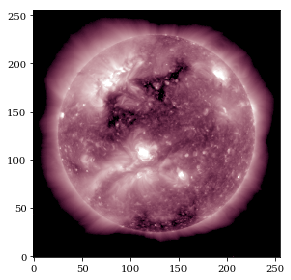

In [8]:
'''
    This is for the APSPM 2020 conference.
'''
#Single image 
#Load data first. Any data would do.
path193 = base+'Data/CrossValidation193/CV_1/Test/Partition1.npy'
path211 = base+'Data/CrossValidation211/CV_1/Train/Partition1.npy'
AIA193=np.load(path193,allow_pickle=True).tolist()
AIA211=np.load(path211,allow_pickle=True).tolist()
print AIA193['output'].shape
print AIA211['input'].shape
#First the aia images.
Nimg=4
rowind=['AIA193','AIA211']
tmp=AIA193['output']
tmp2=AIA211['output']
for i in xrange(Nimg):
    plt.imshow(AIA193['input'][i,:],origin='lower',cmap='sdoaia193')
    plt.tight_layout()
    #plt.savefig('Plots/APSPM2020/AIA_193_%d.png'%(i),fmt='png',dpi=300)
    plt.imshow(AIA211['input'][i,:],origin='lower',cmap='sdoaia211')
    plt.tight_layout()
    #plt.savefig('Plots/APSPM2020/AIA_211_%d.png'%(i),fmt='png',dpi=300)

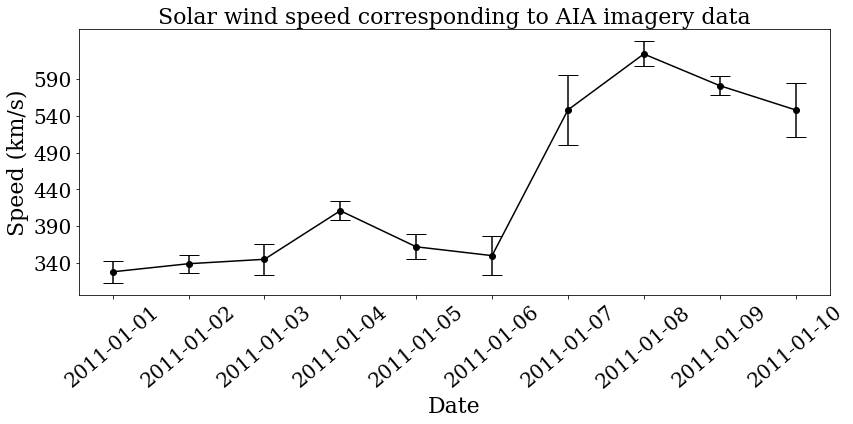

In [9]:
#sns.set_style("ticks")
plt.figure(figsize=(12,6),facecolor="w")
Nimg=10
tmp=AIA193['output'].astype(int)
dt=[(datetime.datetime(tmp[i,0],1,1)+datetime.timedelta(tmp[i,1]-1)).date() for i in xrange(Nimg)]
plt.title('Solar wind speed corresponding to AIA imagery data',fontsize=22)
plt.errorbar(dt,AIA193['output'][:Nimg,11],yerr=AIA193['output'][:Nimg,14],marker='o',ecolor='black',mfc='black',color='black',capsize=10)
plt.ylabel('Speed (km/s)',fontsize=22)
plt.xlabel('Date', fontsize=22)
plt.xticks(fontsize=20, rotation=40)
plt.yticks(np.arange(340,600,50.0),fontsize=20)
plt.tight_layout()
#plt.savefig('Plots/AIA_solarwind_data.eps',fmt='eps',dpi=500)
#plt.savefig('Plots/AIA_solarwind_data.pdf',fmt='pdf',dpi=300)

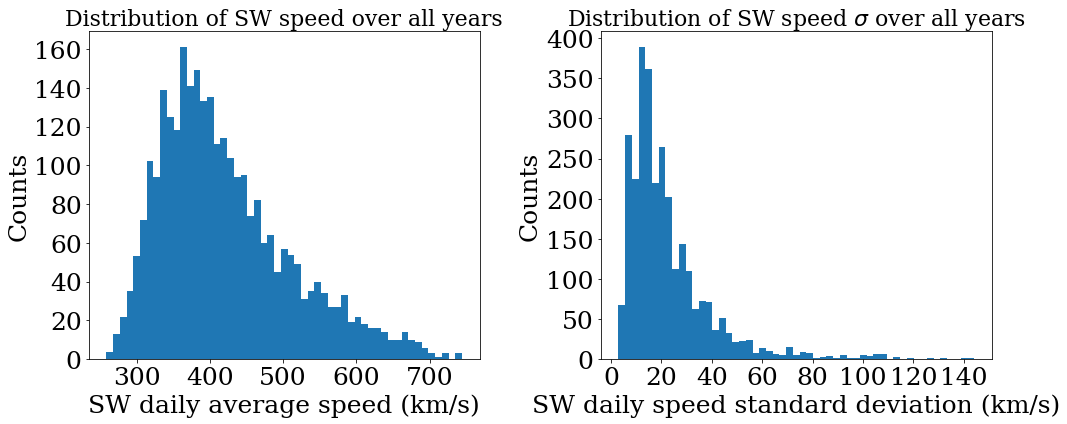

In [10]:
#Plotting solar wind statistics
swspeed=np.loadtxt(base+'OMNI/data_OMNI.lst')[:,13]
swstd=np.loadtxt(base+'OMNI/data_OMNI.lst')[:,16]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
_=plt.hist(swspeed,int(np.sqrt(len(swspeed))))
plt.ylabel('Counts',fontsize=25)
plt.xlabel('SW daily average speed (km/s)', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Distribution of SW speed over all years',fontsize=22)
plt.subplot(1,2,2)
_=plt.hist(swstd,int(np.sqrt(len(swspeed))))
plt.ylabel('Counts',fontsize=25)
plt.xlabel('SW daily speed standard deviation (km/s)', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Distribution of SW speed $\sigma$ over all years',fontsize=22)
plt.tight_layout()
#plt.savefig('Plots/SWstats.pdf',dpi=300)
#plt.savefig('Plots/SWstats.eps',dpi=300)

## Masking algorithm result

Masking result on both 211 and 193 is shown below

### NOTE: Make sure the 211 and 193 dates are same!

In [11]:
path211=base+'Data/CrossValidation211/CV_1/Test/Partition103.npy'
path193=base+'Data/CrossValidation193/CV_1/Train/Partition103.npy'
maskpath211=base+'Data/Mask/CrossValidation211/CV_1/Test/Partition103.npy'
maskpath193=base+'Data/Mask/CrossValidation193/CV_1/Train/Partition103.npy'
'''
The original images are 256x256, while masks are generated on 224x224 images. 
Imresize is a custom function to resize the images to 224x224, and to make them 3 channeled
by replicating the existing image.
'''
index_193=0
index_211=0
aia211=Imresize(np.load(path211,allow_pickle=True).tolist()['input'],224)[:,:,:,0]
mask211=np.load(maskpath211,allow_pickle=True).tolist()
aia193=Imresize(np.load(path193,allow_pickle=True).tolist()['input'],224)[:,:,:,0]
mask193=np.load(maskpath193,allow_pickle=True).tolist()
Dates=np.load(path193,allow_pickle=True).tolist()['output'][index_193,:3]
dt=datetime.datetime(int(Dates[0]),1,1)+datetime.timedelta(int(Dates[1])-1)
print "193 A date: ",dt
Dates=np.load(path211,allow_pickle=True).tolist()['output'][index_211,:3]
dt=datetime.datetime(int(Dates[0]),1,1)+datetime.timedelta(int(Dates[1])-1)
print "211 A date: ",dt
print "Both the dates should match to plot the corresponding images."
print aia193.shape
print aia211.shape
print mask193.keys()
print mask211.keys()
img_193=aia193[index_193,:]
mask_193_ch=mask193['hole'][index_193,:]
mask_194_hot=mask193['hot'][index_193,:]
img_211=aia211[index_211,:]
mask_211_ch=mask211['hole'][index_211,:]
mask_211_hot=mask211['hot'][index_211,:]

193 A date:  2016-01-26 00:00:00
211 A date:  2016-01-26 00:00:00
Both the dates should match to plot the corresponding images.
(20, 224, 224)
(20, 224, 224)
['hole', 'hot']
['hole', 'hot']


In [12]:
#Define custom functions to do the plotting.
def GetContours(tmp):
    '''
        Function takes in an image, and returns an a set of coordinates which demarcate the
        requisite contours
    '''
    grads=laplace(tmp)
    ar=np.where(grads!=0)
    return [ar[0],ar[1]]
def PlotContours(img,msk_hole,msk_hot,colmap='sdoaia193'):
    '''
        Given input image, plot it and overlay with the contours.
    '''
    plt.imshow(img,origin='lower',cmap=colmap)
    plt.xlim((0,224))
    plt.ylim((0,224))
    coord_hole=GetContours(msk_hole)
    plt.scatter(coord_hole[1],coord_hole[0],s=8,marker=".",c='xkcd:lipstick red')
    coord_hole=GetContours(msk_hot)
    plt.scatter(coord_hole[1],coord_hole[0],s=8,marker=".",c='xkcd:emerald')
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

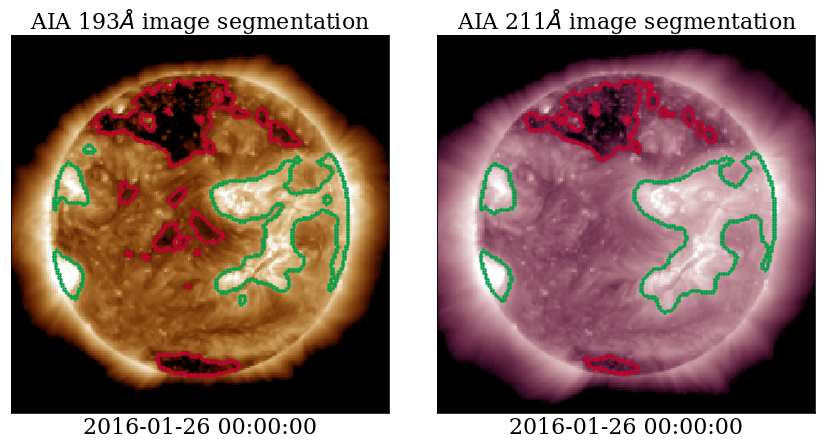

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
PlotContours(img_193,mask_193_ch,mask_194_hot,'sdoaia193')
plt.title('AIA 193$\AA$ image segmentation',fontsize=22)
plt.xlabel(dt,fontsize=22)
plt.subplot(1,2,2)
PlotContours(img_211,mask_211_ch,mask_211_hot,'sdoaia211')
plt.title('AIA 211$\AA$ image segmentation',fontsize=22)
plt.xlabel(dt,fontsize=22)
plt.tight_layout()
#plt.text(-160,250,'Active region enclosing contour', ha="center", va="bottom", size=22 ,color='xkcd:emerald')
#plt.text(110,250,'Coronal hole enclosing contour', ha="center", va="bottom", size=22 ,color='xkcd:lipstick red')
#plt.savefig('Plots/AIA_Segmentation.eps',fmt='eps',dpi=300)
#plt.savefig('Plots/AIA_Segmentation.pdf',fmt='pdf',dpi=300)

### Making the Correlation plots for various days.

First, we make the correlation plots for various days, and then we look to combining all the results.

In [15]:
pers=[]
for cv in np.arange(1,6):
    persistence=np.load('Models/27DayPersistence/193/CV_%d/27DayPersist/Test_stats.npy'%(cv),allow_pickle=True).tolist()
    pers.append(persistence['correl'])
pers_m=np.mean(pers)
pers_std=np.std(pers)

In [16]:
print pers_std,pers_m

0.02385436853001585 0.4569456798419494


['../GapFillingData/../WindNet/Plots/WindNet/Matrix_WindNet_193.npy', '../GapFillingData/../WindNet/Plots/WindNet/Matrix_WindNet_211.npy', '../GapFillingData/../WindNet/Plots/Benchmark/Matrix_Benchmark_XGBoost_SW.npy', '../GapFillingData/../WindNet/Plots/Benchmark/Matrix_Benchmark_Persist.npy', '../GapFillingData/../WindNet/Plots/Benchmark/Matrix_Benchmark_SWSVM_Linear.npy', '../GapFillingData/../WindNet/Plots/Benchmark/Matrix_Benchmark_SWSVM_RBF.npy', '../GapFillingData/../WindNet/Plots/Benchmark/Matrix_Benchmark_SWSVM_Poly.npy', '../GapFillingData/../WindNet/Plots/Benchmark/Matrix_Benchmark_NaiveMean.npy']
['WindNet 193 $\\AA$', 'WindNet 211 $\\AA$', 'XGBoosted regressor', 'Persistence', 'SVM with Linear kernel', 'SVM with RBF kernel', 'SVM with Polynomial kernel of order 2', 'Naive mean model']


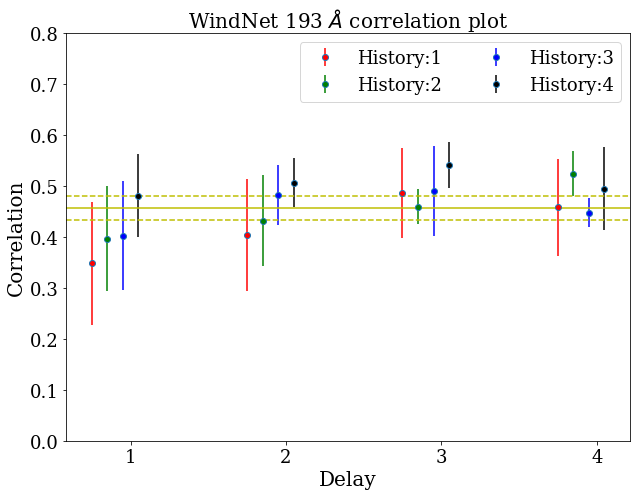

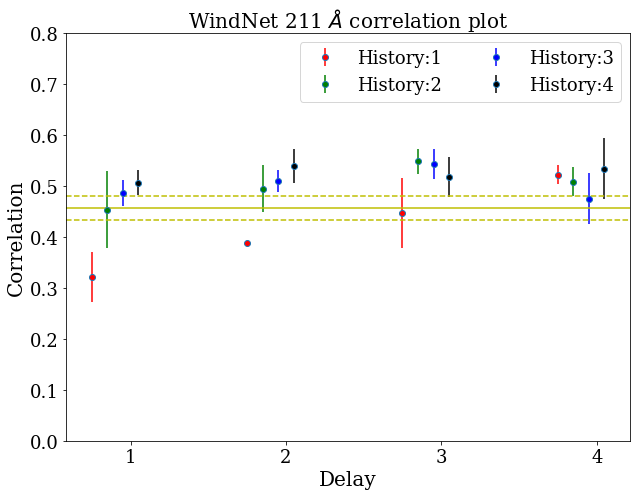

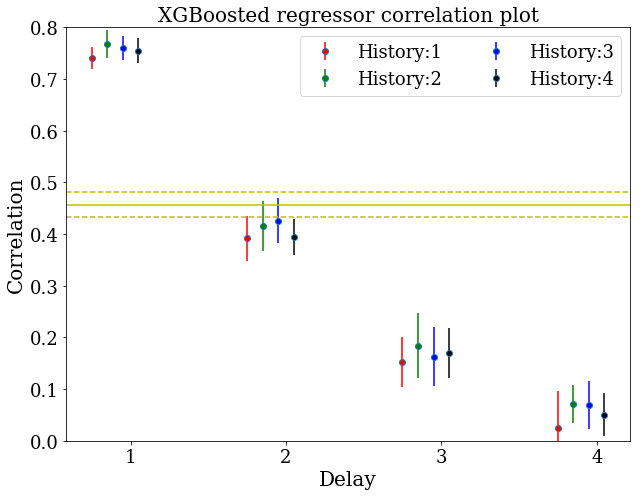

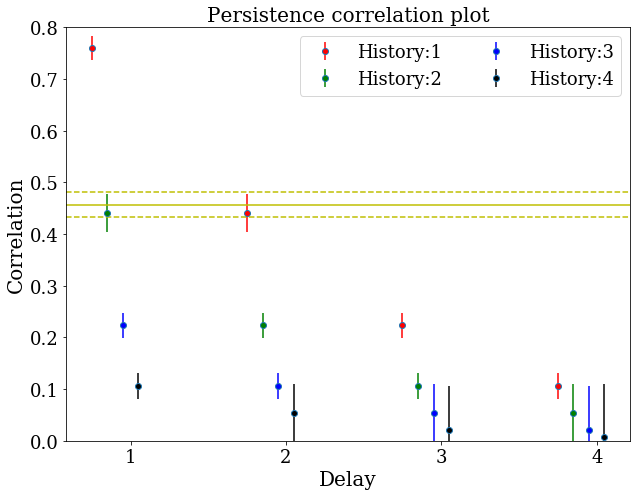

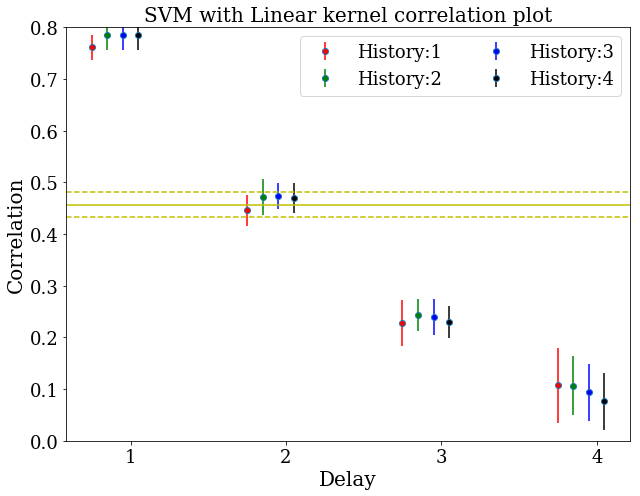

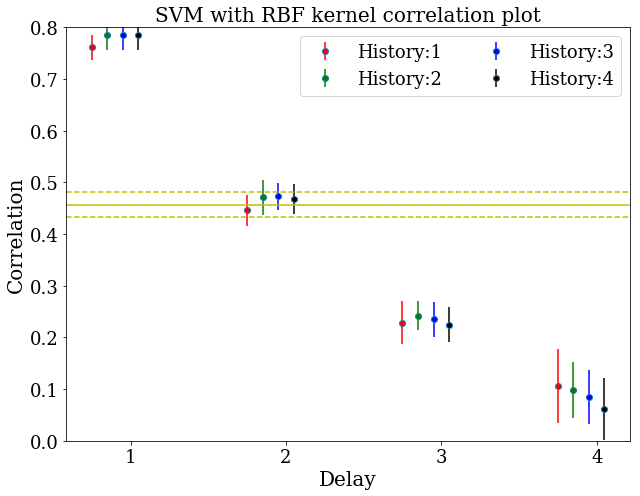

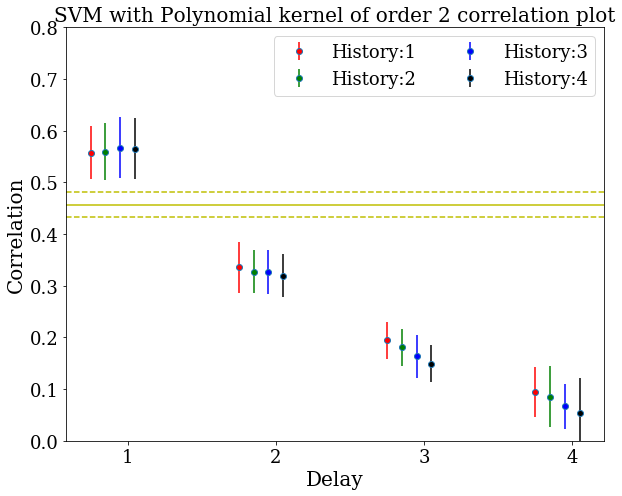

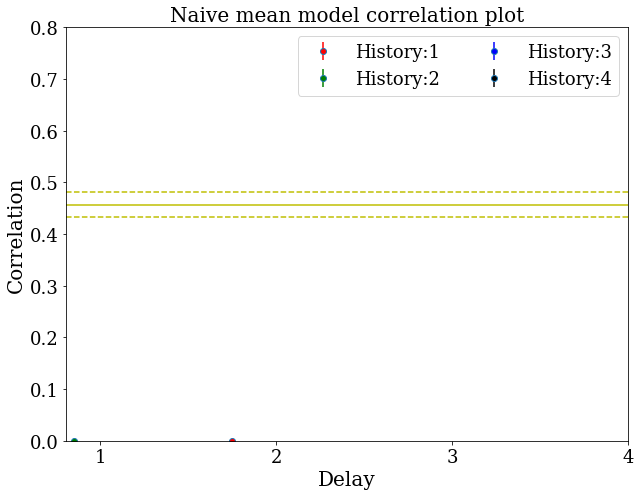

In [17]:
bp=base+'../WindNet/Plots/'
paths=[bp+'WindNet/Matrix_WindNet_193.npy',bp+'WindNet/Matrix_WindNet_211.npy',bp+'Benchmark/Matrix_Benchmark_XGBoost_SW.npy']
paths+=[bp+'Benchmark/Matrix_Benchmark_Persist.npy',bp+'Benchmark/Matrix_Benchmark_SWSVM_Linear.npy']
paths+=[bp+'Benchmark/Matrix_Benchmark_SWSVM_RBF.npy',bp+'Benchmark/Matrix_Benchmark_SWSVM_Poly.npy',bp+'Benchmark/Matrix_Benchmark_NaiveMean.npy']
print paths
names=['WindNet 193 $\AA$','WindNet 211 $\AA$','XGBoosted regressor','Persistence','SVM with Linear kernel']
names+=['SVM with RBF kernel','SVM with Polynomial kernel of order 2','Naive mean model']
print names
savename=['193','211','XGBoost','Persist','SVM_Linear','SVM_RBF','SVM_Poly','NaiveMean']
cols=['r','g','b','k']

for j in xrange(len(paths)):
    Correl=np.load(paths[j],allow_pickle=True).tolist()['Correlation']
    plt.figure(figsize=(9,7))
    #sns.set_style("ticks")
    for i in xrange(Correl['data'].shape[0]):
        tmpx=np.arange(1+0.1*i-0.25,Correl['data'].shape[0]+1+0.1*i-0.25)
        tmpy=Correl['data'][i,:]
        erry=Correl['error'][i,:]
        plt.errorbar(tmpx,tmpy,erry,linestyle='none',marker='o',ecolor=cols[i],mfc=cols[i],label='History:%d'%(i+1))
        plt.xlabel('Delay',fontsize=20)
        plt.xticks(np.arange(1,5),fontsize=18)
        plt.yticks(fontsize=18)
        plt.ylabel('Correlation',fontsize=20)
        plt.title(names[j]+' correlation plot',fontsize=20)
        plt.legend(loc='best',prop={'size':18},ncol=2)
    plt.axis([None,None,0.0,0.8])
    plt.axhline(pers_m,color='y',linestyle='-',label='27 day Persistence')
    plt.axhline(pers_m-pers_std,color='y',linestyle='--',label='27 day Persistence std')
    plt.axhline(pers_m+pers_std,color='y',linestyle='--',label='27 day Persistence std')
    plt.tight_layout()
    #plt.savefig(bp+'Refree_Correlation_'+savename[j]+'.eps',fmt='eps',dpi=500)
    #plt.savefig(bp+'Refree_Correlation_'+savename[j]+'.pdf',fmt='pdf',dpi=400)

### Similar plots must be made for MSE and RedMSE too. 

Next cell is for MSE. 

In [18]:
pers=[]
for cv in np.arange(1,6):
    persistence=np.load('Models/27DayPersistence/193/CV_%d/27DayPersist/Test_stats.npy'%(cv),allow_pickle=True).tolist()
    pers.append(persistence['mse'])
pers_m=np.mean(pers)
pers_std=np.std(pers)

['../GapFillingData/../WindNet/Plots/WindNet/Matrix_WindNet_193.npy', '../GapFillingData/../WindNet/Plots/WindNet/Matrix_WindNet_211.npy', '../GapFillingData/../WindNet/Plots/Benchmark/Matrix_Benchmark_XGBoost_SW.npy', '../GapFillingData/../WindNet/Plots/Benchmark/Matrix_Benchmark_Persist.npy', '../GapFillingData/../WindNet/Plots/Benchmark/Matrix_Benchmark_SWSVM_Linear.npy', '../GapFillingData/../WindNet/Plots/Benchmark/Matrix_Benchmark_SWSVM_RBF.npy', '../GapFillingData/../WindNet/Plots/Benchmark/Matrix_Benchmark_SWSVM_Poly.npy', '../GapFillingData/../WindNet/Plots/Benchmark/Matrix_Benchmark_NaiveMean.npy']
['WindNet 193 $\\AA$', 'WindNet 211 $\\AA$', 'XGBoosted regressor', 'Persistence', 'SVM with Linear kernel', 'SVM with RBF kernel', 'SVM with Polynomial kernel of order 2', 'Naive mean model']


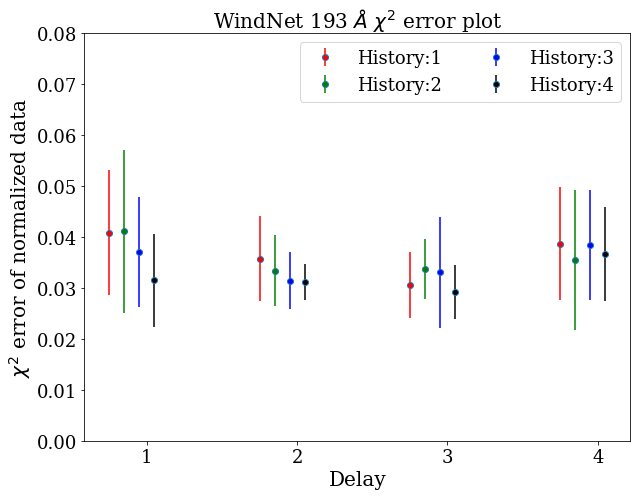

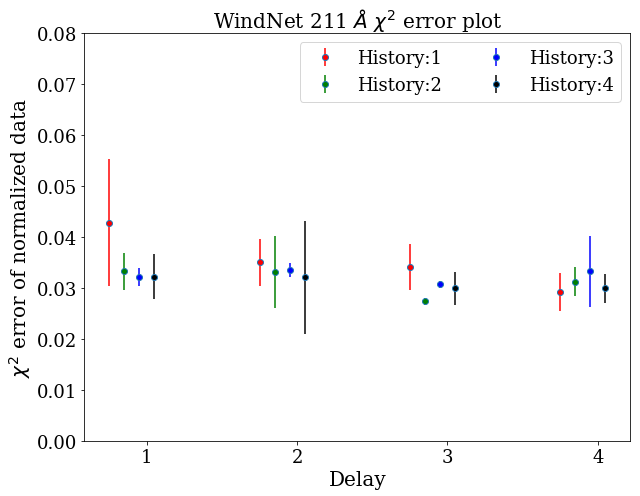

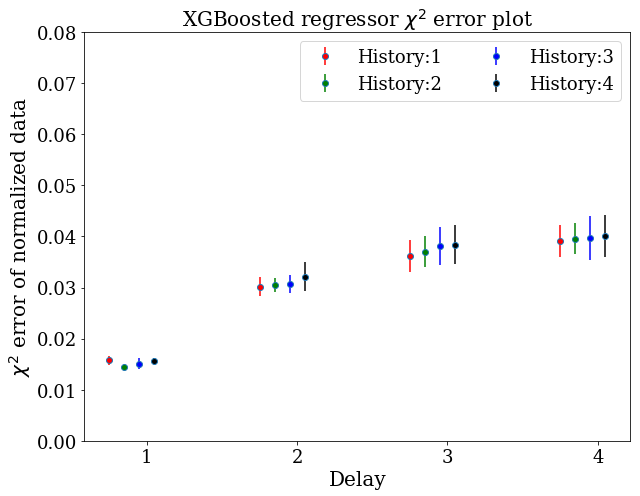

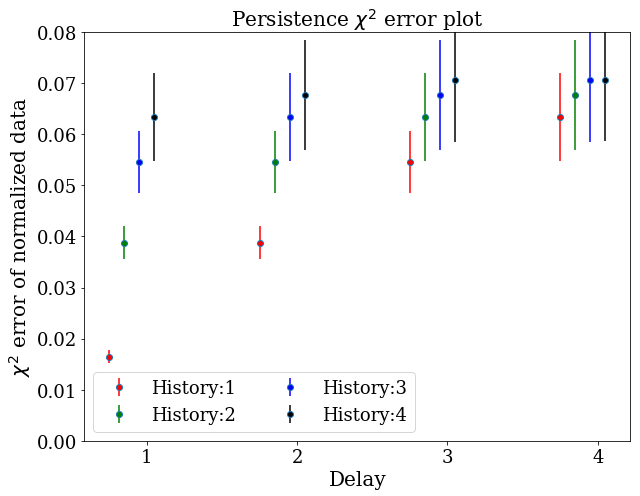

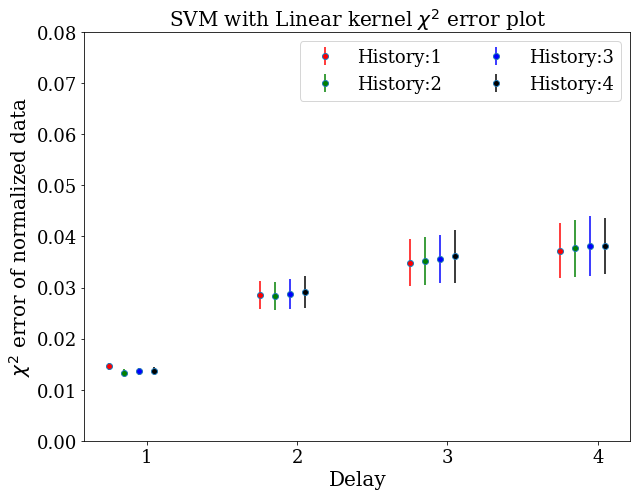

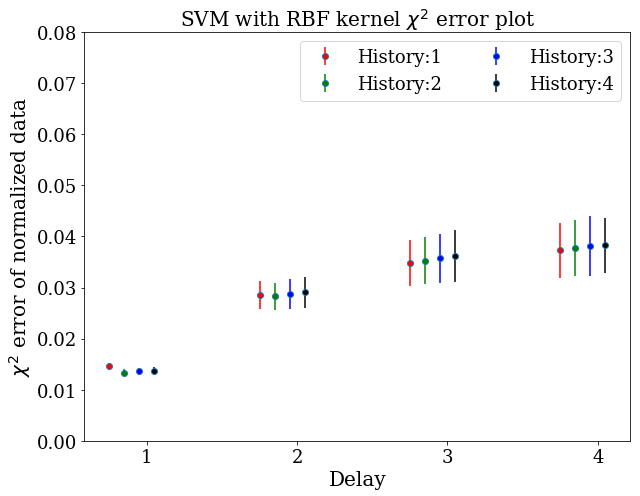

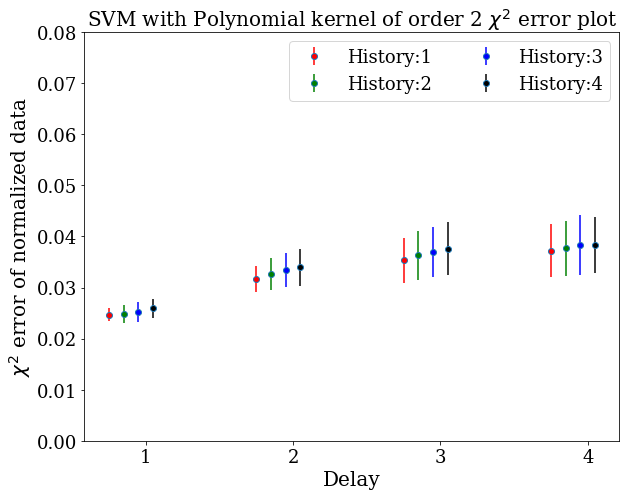

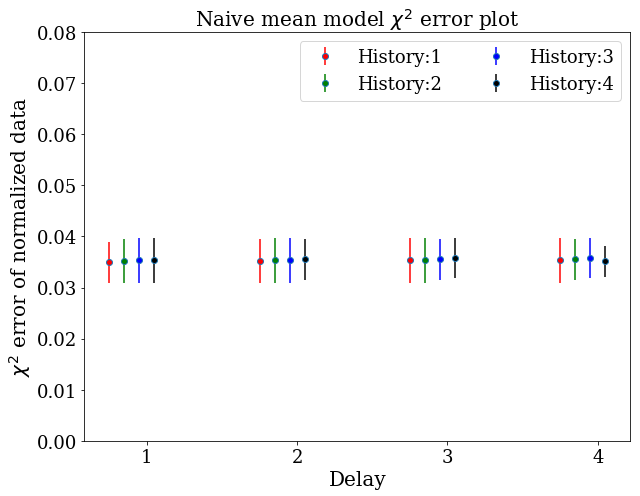

In [19]:
paths=[bp+'WindNet/Matrix_WindNet_193.npy',bp+'WindNet/Matrix_WindNet_211.npy',bp+'Benchmark/Matrix_Benchmark_XGBoost_SW.npy']
paths+=[bp+'Benchmark/Matrix_Benchmark_Persist.npy',bp+'Benchmark/Matrix_Benchmark_SWSVM_Linear.npy']
paths+=[bp+'Benchmark/Matrix_Benchmark_SWSVM_RBF.npy',bp+'Benchmark/Matrix_Benchmark_SWSVM_Poly.npy',bp+'Benchmark/Matrix_Benchmark_NaiveMean.npy']
print paths
names=['WindNet 193 $\AA$','WindNet 211 $\AA$','XGBoosted regressor','Persistence','SVM with Linear kernel']
names+=['SVM with RBF kernel','SVM with Polynomial kernel of order 2','Naive mean model']
print names
savename=['193','211','XGBoost','Persist','SVM_Linear','SVM_RBF','SVM_Poly','NaiveMean']
cols=['r','g','b','k']
for j in xrange(len(paths)):
    Correl=np.load(paths[j],allow_pickle=True).tolist()['MSE']
    plt.figure(figsize=(9,7))
    #sns.set_style("ticks")
    for i in xrange(Correl['data'].shape[0]):
        tmpx=np.arange(1+0.1*i-0.25,Correl['data'].shape[0]+1+0.1*i-0.25)
        tmpy=Correl['data'][i,:]
        erry=Correl['error'][i,:]
        plt.errorbar(tmpx,tmpy,erry,linestyle='none',marker='o',ecolor=cols[i],mfc=cols[i],label='History:%d'%(i+1))
        plt.xlabel('Delay',fontsize=20)
        plt.xticks(np.arange(1,5),fontsize=18)
        plt.yticks(fontsize=18)
        plt.ylabel('$\chi^2$ error of normalized data',fontsize=20)
        plt.title(names[j]+' $\chi^2$ error plot',fontsize=20)
        plt.legend(loc='best',prop={'size':18},ncol=2)
    plt.axis([None,None,0.0,0.08])
    plt.axhline(pers_m,color='y',linestyle='-',label='27 day Persistence')
    plt.axhline(pers_m-pers_std,color='y',linestyle='--',label='27 day Persistence std')
    plt.axhline(pers_m+pers_std,color='y',linestyle='--',label='27 day Persistence std')
    plt.tight_layout()
    #plt.savefig(bp+'Refree_MSE_'+savename[j]+'.eps',fmt='eps',dpi=500)
    #plt.savefig(bp+'Refree_MSE_'+savename[j]+'.pdf',fmt='pdf',dpi=400)

Reduced MSE plotting.

In [20]:
pers=[]
for cv in np.arange(1,6):
    persistence=np.load('Models/27DayPersistence/193/CV_%d/27DayPersist/Test_stats.npy'%(cv),allow_pickle=True).tolist()
    pers.append(persistence['redmse'])
pers_m=np.mean(pers)
pers_std=np.std(pers)

['../GapFillingData/../WindNet/Plots/WindNet/Matrix_WindNet_193.npy', '../GapFillingData/../WindNet/Plots/WindNet/Matrix_WindNet_211.npy', '../GapFillingData/../WindNet/Plots/Benchmark/Matrix_Benchmark_XGBoost_SW.npy', '../GapFillingData/../WindNet/Plots/Benchmark/Matrix_Benchmark_Persist.npy', '../GapFillingData/../WindNet/Plots/Benchmark/Matrix_Benchmark_SWSVM_Linear.npy', '../GapFillingData/../WindNet/Plots/Benchmark/Matrix_Benchmark_SWSVM_RBF.npy', '../GapFillingData/../WindNet/Plots/Benchmark/Matrix_Benchmark_SWSVM_Poly.npy', '../GapFillingData/../WindNet/Plots/Benchmark/Matrix_Benchmark_NaiveMean.npy']
['WindNet 193 $\\AA$', 'WindNet 211 $\\AA$', 'XGBoosted regressor', 'Persistence', 'SVM with Linear kernel', 'SVM with RBF kernel', 'SVM with Polynomial kernel of order 2', 'Naive mean model']


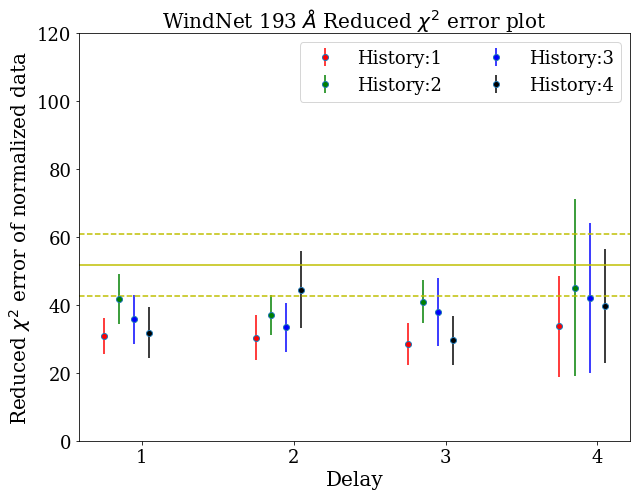

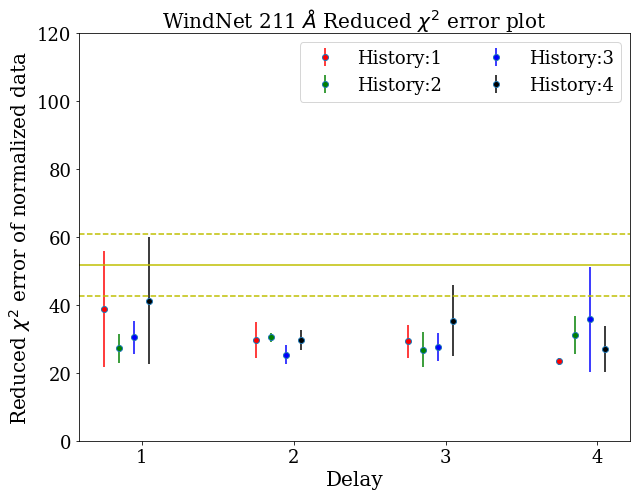

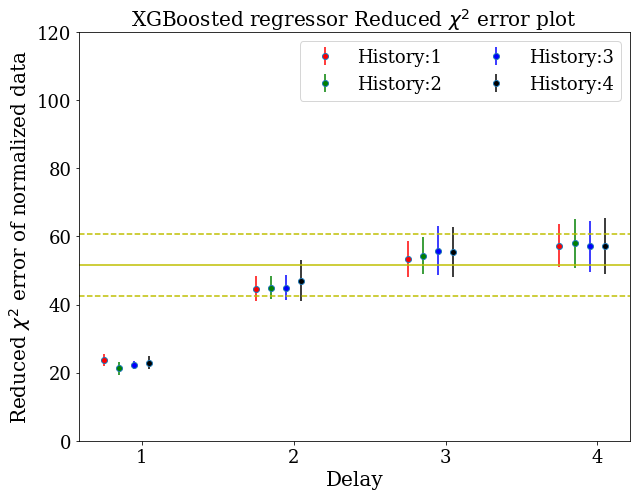

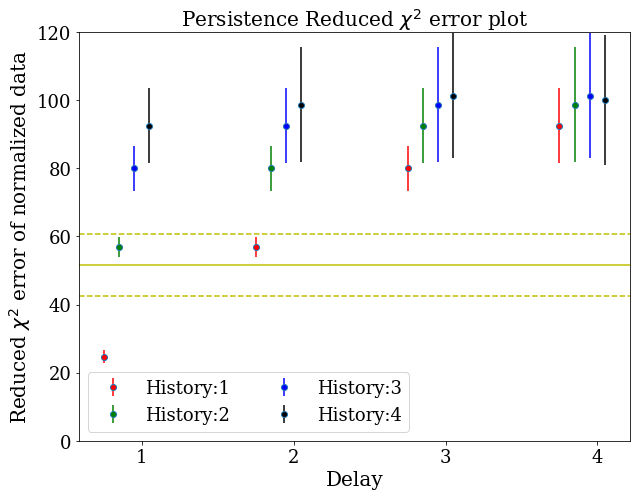

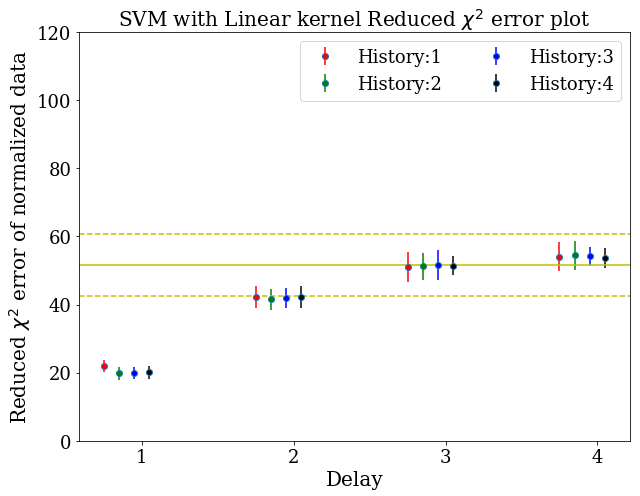

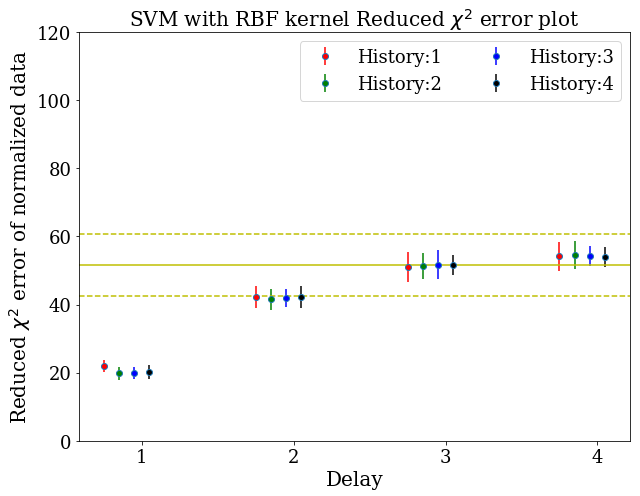

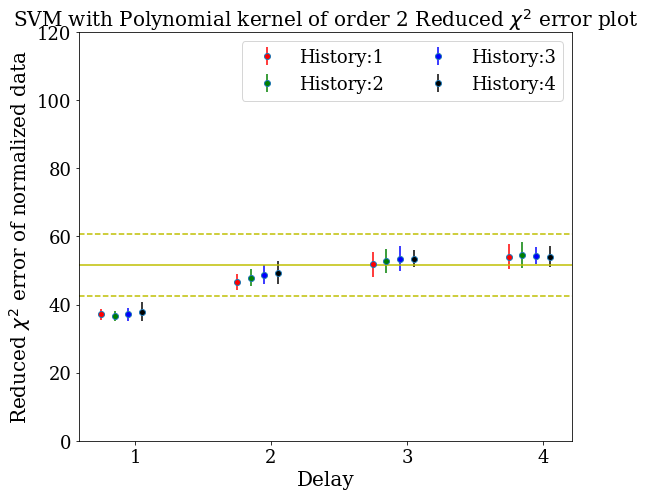

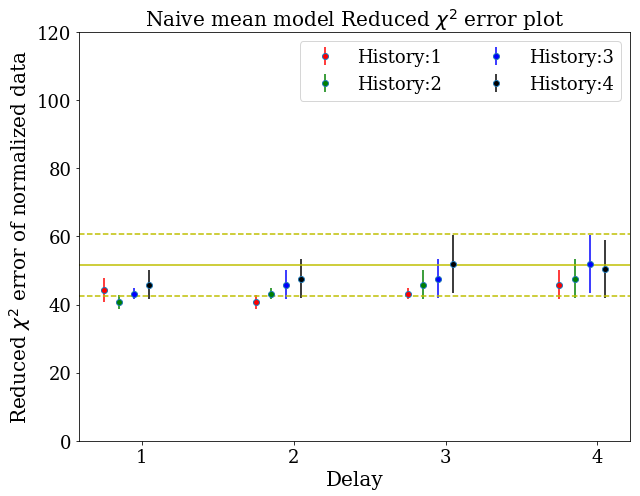

In [21]:
paths=[bp+'WindNet/Matrix_WindNet_193.npy',bp+'WindNet/Matrix_WindNet_211.npy',bp+'Benchmark/Matrix_Benchmark_XGBoost_SW.npy']
paths+=[bp+'Benchmark/Matrix_Benchmark_Persist.npy',bp+'Benchmark/Matrix_Benchmark_SWSVM_Linear.npy']
paths+=[bp+'Benchmark/Matrix_Benchmark_SWSVM_RBF.npy',bp+'Benchmark/Matrix_Benchmark_SWSVM_Poly.npy',bp+'Benchmark/Matrix_Benchmark_NaiveMean.npy']
print paths
names=['WindNet 193 $\AA$','WindNet 211 $\AA$','XGBoosted regressor','Persistence','SVM with Linear kernel']
names+=['SVM with RBF kernel','SVM with Polynomial kernel of order 2','Naive mean model']
print names
savename=['193','211','XGBoost','Persist','SVM_Linear','SVM_RBF','SVM_Poly','NaiveMean']
cols=['r','g','b','k']
for j in xrange(len(paths)):
    Correl=np.load(paths[j],allow_pickle=True).tolist()['RedMSE']
    plt.figure(figsize=(9,7))
    #sns.set_style("ticks")
    for i in xrange(Correl['data'].shape[0]):
        tmpx=np.arange(1+0.1*i-0.25,Correl['data'].shape[0]+1+0.1*i-0.25)
        tmpy=Correl['data'][i,:]
        erry=Correl['error'][i,:]
        plt.errorbar(tmpx,tmpy,erry,linestyle='none',marker='o',ecolor=cols[i],mfc=cols[i],label='History:%d'%(i+1))
        plt.xlabel('Delay',fontsize=20)
        plt.xticks(np.arange(1,5),fontsize=18)
        plt.yticks(fontsize=18)
        plt.ylabel('Reduced $\chi^2$ error of normalized data',fontsize=20)
        plt.title(names[j]+' Reduced $\chi^2$ error plot',fontsize=20)
        plt.legend(loc='best',prop={'size':18},ncol=2)
    plt.axis([None,None,0.0,120.0])
    plt.axhline(pers_m,color='y',linestyle='-',label='27 day Persistence')
    plt.axhline(pers_m-pers_std,color='y',linestyle='--',label='27 day Persistence std')
    plt.axhline(pers_m+pers_std,color='y',linestyle='--',label='27 day Persistence std')
    plt.tight_layout()
    #plt.savefig(bp+'Refree_RedMSE_'+savename[j]+'.eps',fmt='eps',dpi=500)
    #plt.savefig(bp+'Refree_RedMSE_'+savename[j]+'.pdf',fmt='pdf',dpi=400)

## Activation plots

We make activation plots next. Each model combination is plotted separately. However, we overplot 211 and 193 data for easier comparison.


In [22]:
def PlotActivation(Atten,St_std,Maxvalue,Minvalue,history,delay):
    #cols=['xkcd:purple','xkcd:purple','xkcd:cranberry','xkcd:cranberry']
    #ecols=['xkcd:purple','xkcd:purple','xkcd:cranberry','xkcd:cranberry']#['tab:gray','xkcd:rose','xkcd:sand','xkcd:pastel orange']
    cols=['#0099f1','#0099f1','xkcd:vermillion','xkcd:vermillion']
    mfc_cols=['white','#0099f1','white','xkcd:vermillion']
    ecols=['#0099f1','#0099f1','xkcd:vermillion','xkcd:vermillion']
    wtype={'Large':'Fast wind','Small':'Slow wind'}
    rtype={'hole':'CH','hot':'AR'}
    mrkr={'hole':'D','hot':'o'}
    plt.figure(figsize=(14,12))
    j=1
    for swtype in ['Large','Small']:
        plt.subplot(2,1,j)
        i=0
        for ch_filter in [211,193]:
            for iden in ['hole','hot']:
                at=np.reshape(Atten[iden+str(swtype)+str(ch_filter)],[-1])
                st=np.reshape(St_std[iden+str(swtype)+str(ch_filter)],[-1])
                mx=np.reshape(Maxvalue[iden+str(swtype)+str(ch_filter)],[-1])-at
                mi=at-np.reshape(Minvalue[iden+str(swtype)+str(ch_filter)],[-1])
                comber=np.asarray([mi,mx])
                xval=np.arange(-history-delay+1-0.038*i+0.071,0.071+1-delay-0.038*i,1)
                if len(xval)>len(at):
                    xval=xval[:-1]
                plt.errorbar(xval,at,yerr=st*3,linestyle='none',marker=mrkr[iden],markersize=15,color=cols[i],ecolor=ecols[i],mfc=mfc_cols[i],capsize=5.0,elinewidth=3,label='%d $\AA$: '%(ch_filter)+rtype[iden])
                plt.legend(loc='best',prop={'size':25},ncol=1)
                plt.yticks(fontsize=20)
                plt.xticks(np.arange(-history-delay+1,1-delay),fontsize=20)
                plt.title("Activation over "+ wtype[swtype]+' prediction: %d day history, %d day delay'%(history,delay),fontsize=25)
                plt.ylabel('Mean activation value',fontsize=25)
                plt.xlabel('Days prior to prediction',fontsize=25)
                plt.ticklabel_format(axis='y',style='sci', scilimits=(-2,2))
                i=i+1
        j+=1
    plt.tight_layout()
    #plt.savefig('Plots/ActivationTrend_%d%d.pdf'%(history,delay),dpi=500,fmt='pdf')
    #plt.savefig('Plots/ActivationTrend_%d%d.eps'%(history,delay),dpi=500,fmt='eps')

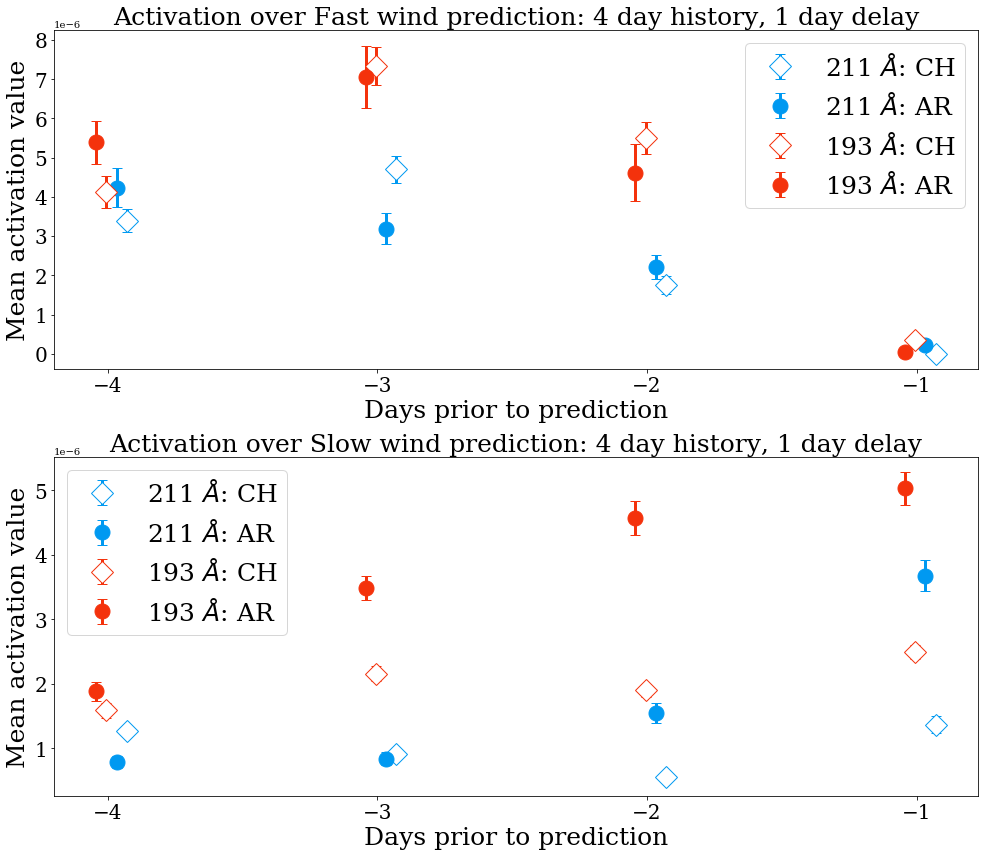

In [23]:
for history in [4]:
    for delay in [1]:
        Atten={}
        St_std={}
        Maxvalue={}
        Minvalue={}
        for ch_filter in [211,193]:
            WindNet_attention = np.load(base+'Plots/WindNet/WindNet_attn_'+str(ch_filter)+'.npy',allow_pickle=True).tolist()
            Trend=WindNet_attention
            '''
            Generating the average values. Basically compute the mean activation per day per model (above), and add them.
            '''
            for iden in ['hot','hole']:
                for swtype in ['Large','Small']:
                    tmp=np.zeros([history,5])
                    #tmp2=np.zeros([history,5])
                    tmp_sw= None
                    for cv in np.arange(1,6):
                        keyval = 'attention_'+str(swtype)+'_'+iden+'_'+str(history)+'_'+str(delay)+'_'+str(cv)
                        swval = Trend[keyval][0]
                        if iden in ['closedLoop']:
                            swval=np.mean(swval,axis=0)
                        if tmp_sw is None:
                            tmp_sw=swval
                        else:
                            tmp_sw=np.concatenate([tmp_sw,swval],axis=0)
                        #tmp[:,cv-1]=np.reshape(swval,[-1])
                    swval = np.mean(tmp_sw,axis=0)
                    maxv=np.max(tmp_sw,axis=0)  
                    minv=np.min(tmp_sw,axis=0)  
                    std=np.std(tmp_sw,axis=0)/np.sqrt(len(tmp_sw))
                    attar=swval
                    Maxval=np.reshape(maxv,[-1])
                    Minval=np.reshape(minv,[-1])
                    Std=np.reshape(std,[-1])
                    Atten[iden+str(swtype)+str(ch_filter)] = attar
                    St_std[iden+str(swtype)+str(ch_filter)] = Std
                    Maxvalue[iden+str(swtype)+str(ch_filter)] = Maxval
                    Minvalue[iden+str(swtype)+str(ch_filter)] = Minval
        PlotActivation(Atten,St_std,Maxvalue,Minvalue,history,delay)

## Prediction plots.

The plots indicating prediction from the model are shown in `WindNet_easy_demo.ipynb`. This notebook also contains the sample GC map put in the paper.

## Tables

The tables made with various metrics may be found in `MetricMaker.ipynb`.

## Plotting all correlations in the same plot.

An attempt to plot all correlations in the same plot. This may be found in my poster at the ML-Helio 2019 conference, or in the presentation at the 5th APSPM in Pune.

In [24]:
#path = 'ForPlotting/ComparisonMatrices/Matrix.npy'
bp=base+'Plots/'
paths=[bp+'WindNet/Matrix_WindNet_193_FischerAvg_.npy',bp+'WindNet/Matrix_WindNet_211_FischerAvg_.npy',bp+'Benchmark/Matrix_Benchmark_XGBoost_SW_FischerAvg_.npy']
paths+=[bp+'Benchmark/Matrix_Benchmark_Persist_FischerAvg_.npy',bp+'Benchmark/Matrix_Benchmark_SWSVM_Linear_FischerAvg_.npy']
paths+=[bp+'Benchmark/Matrix_Benchmark_SWSVM_RBF_FischerAvg_.npy',bp+'Benchmark/Matrix_Benchmark_SWSVM_Poly_FischerAvg_.npy',bp+'Benchmark/Matrix_Benchmark_NaiveMean_FischerAvg_.npy']
print paths
names=['WindNet 193 $\AA$','WindNet 211 $\AA$','XGBoosted regressor','Persistence','SVM with Linear kernel']
names+=['SVM-RBF kernel','SVM-Polynomial kernel','Naive mean model']
Keys=['WindNet193','WindNet211','XGB','Persist','SVML','SVMRBF','SVMPoly','Mean']
print names

['../GapFillingData/Plots/WindNet/Matrix_WindNet_193_FischerAvg_.npy', '../GapFillingData/Plots/WindNet/Matrix_WindNet_211_FischerAvg_.npy', '../GapFillingData/Plots/Benchmark/Matrix_Benchmark_XGBoost_SW_FischerAvg_.npy', '../GapFillingData/Plots/Benchmark/Matrix_Benchmark_Persist_FischerAvg_.npy', '../GapFillingData/Plots/Benchmark/Matrix_Benchmark_SWSVM_Linear_FischerAvg_.npy', '../GapFillingData/Plots/Benchmark/Matrix_Benchmark_SWSVM_RBF_FischerAvg_.npy', '../GapFillingData/Plots/Benchmark/Matrix_Benchmark_SWSVM_Poly_FischerAvg_.npy', '../GapFillingData/Plots/Benchmark/Matrix_Benchmark_NaiveMean_FischerAvg_.npy']
['WindNet 193 $\\AA$', 'WindNet 211 $\\AA$', 'XGBoosted regressor', 'Persistence', 'SVM with Linear kernel', 'SVM-RBF kernel', 'SVM-Polynomial kernel', 'Naive mean model']


In [25]:
pers=[]
for cv in np.arange(1,6):
    persistence=np.load('Models/27DayPersistence/193/CV_%d/27DayPersist/Test_stats.npy'%(cv),allow_pickle=True).tolist()
    print persistence.keys()
    pers.append(persistence['correl']) #NOTE: Apply sqrt() when using mse!
pers_m=np.mean(pers)
pers_std=np.std(pers)/np.sqrt(5)
print pers_m,pers_std

['mse', 'correl', 'redmse']
['mse', 'correl', 'redmse']
['mse', 'correl', 'redmse']
['mse', 'correl', 'redmse']
['mse', 'correl', 'redmse']
0.4569456798419494 0.010667997918689436


In [26]:
key='avg' 
FinalMat={}
for k,path in zip(Keys,paths):
    Mat1=np.load(path,allow_pickle=True).tolist()
    print Mat1.keys()
    if key!='avg':
        FinalMat[k]=Mat1[key]
    else:
        FinalMat[k] = {'data':Mat1[key], 'error': Mat1['std']}

['std', 'min', 'max', 'RedMSE', 'MSE', 'avg']
['std', 'min', 'max', 'RedMSE', 'MSE', 'avg']
['std', 'min', 'max', 'RedMSE', 'MSE', 'avg']
['std', 'min', 'max', 'RedMSE', 'MSE', 'avg']
['std', 'min', 'max', 'RedMSE', 'MSE', 'avg']
['std', 'min', 'max', 'RedMSE', 'MSE', 'avg']
['std', 'min', 'max', 'RedMSE', 'MSE', 'avg']
['std', 'min', 'max', 'RedMSE', 'MSE', 'avg']


In [27]:
FinalMat.keys()

['SVML',
 'XGB',
 'SVMPoly',
 'WindNet193',
 'WindNet211',
 'Persist',
 'SVMRBF',
 'Mean']

In [28]:
print FinalMat['WindNet193']

{'data': array([[0.27655528, 0.37000484, 0.47478036, 0.45525216],
       [0.37266585, 0.46510285, 0.46063241, 0.50953334],
       [0.41123714, 0.46322129, 0.46739747, 0.46377514],
       [0.46835537, 0.47778372, 0.44552192, 0.47897026]]), 'error': array([[0.02918133, 0.02926419, 0.01286369, 0.02991991],
       [0.05009343, 0.0194424 , 0.03217324, 0.02910406],
       [0.03643921, 0.03021465, 0.0292951 , 0.02550875],
       [0.03517342, 0.02822839, 0.03598864, 0.03858373]])}


**FinalMat** is a dictionary with the following keys:

1. SWSVM_Poly
2. SWSVM_Linear
3. SWSVM_RBF
4. Persist
5. NaiveMean
6. XGBoost_SW
7. WindNet

Each key corresponds to: \[Correlation matrix, MSE matrix, Reduced MSE matrix\], and each of the matrix is of shape (4,4).


Text(0.08,0.5,'Correlation')

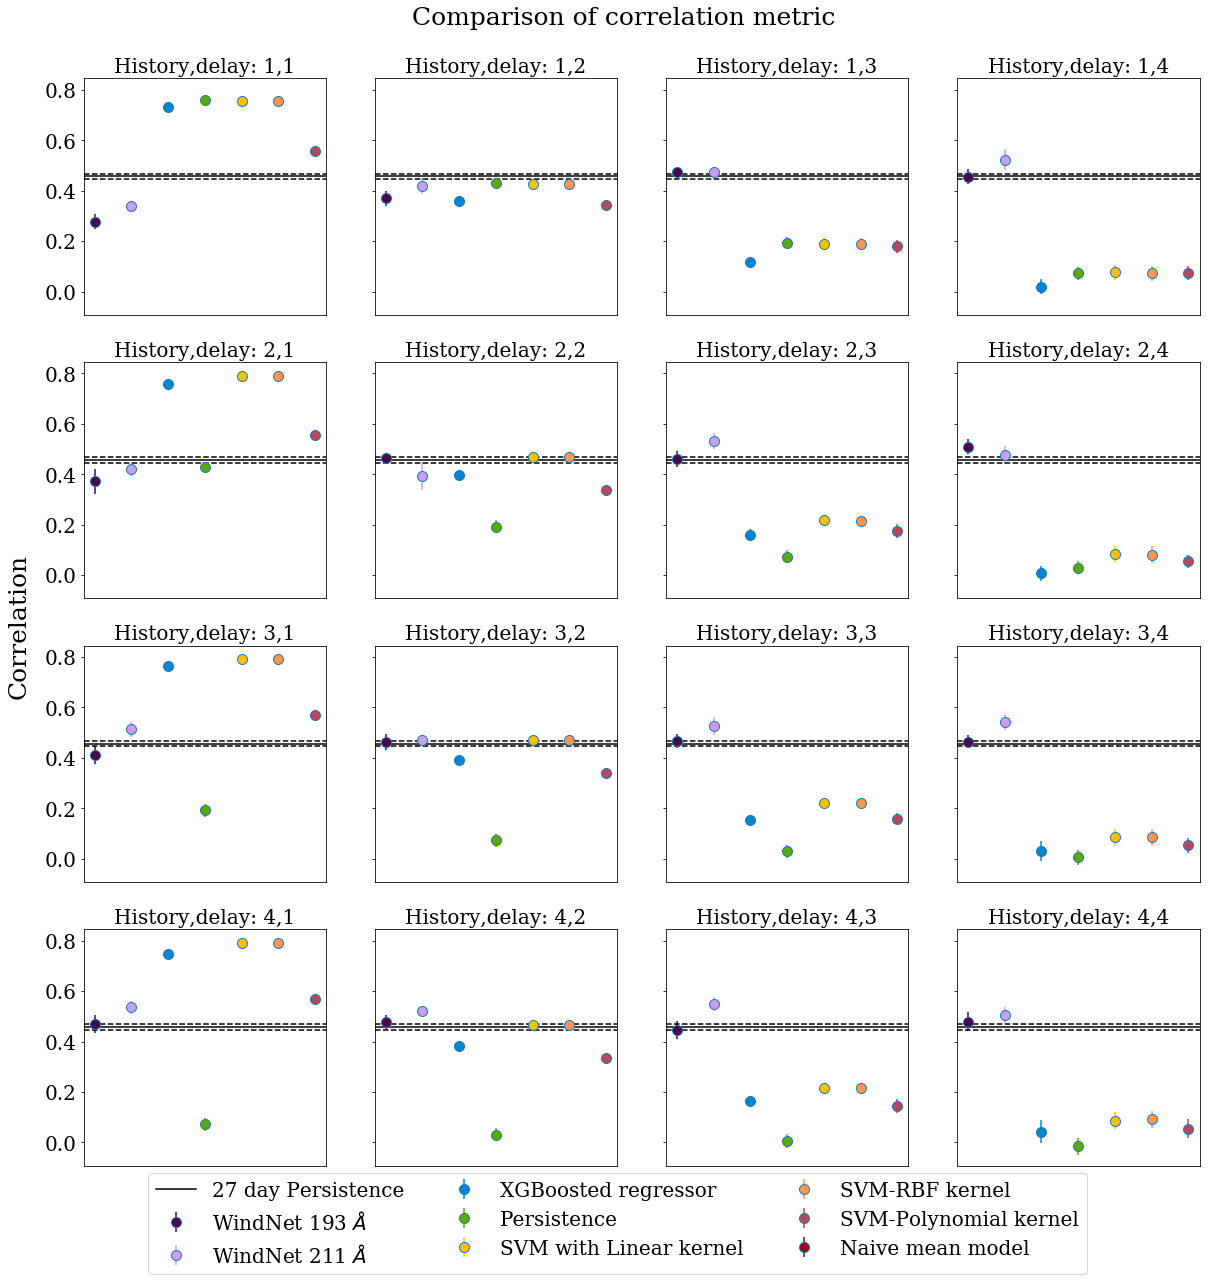

In [29]:
fig,ax = plt.subplots(4,4,sharex = True,sharey = True,figsize=(20,20))
c_spec=['xkcd:deep violet','xkcd:lavender','xkcd:cerulean','xkcd:leaf green','xkcd:goldenrod','xkcd:pastel orange','xkcd:dark rose','xkcd:carmine']
fig.suptitle('Comparison of correlation metric\n',fontsize=25,x=0.5,y=0.93) #
for i in xrange(4):
    for j in xrange(4):
        length = np.arange(1,len(FinalMat.keys())+1)
        l=0
        for k in Keys:
            ax[i,j].errorbar(length[l],FinalMat[k]['data'][i,j],yerr=FinalMat[k]['error'][i,j],markersize='10',label=names[l],ecolor=c_spec[l],mfc=c_spec[l],marker='o',linestyle='none')
            ax[i,j].set_title('History,delay: '+str(i+1)+','+str(j+1),fontsize=20)
            ax[i,j].tick_params(labelsize=20)
            ax[i,j].set_xticks([])
            l = l+1
        ax[i,j].axhline(pers_m,color='k',linestyle='-',label='27 day Persistence')
        ax[i,j].axhline(pers_m-pers_std,color='k',linestyle='--')
        ax[i,j].axhline(pers_m+pers_std,color='k',linestyle='--')
#ax[1,0].set_ylabel('km/s')
#if key in ['MSE']:
plt.legend(bbox_to_anchor=(-1.4,-0.5),loc='lower center',fontsize=20,ncol=3)
fig.text(0.08, 0.5, 'Correlation', ha='center', va='center', rotation='vertical',fontsize=25)
#plt.tigh
#fig.savefig("Plots/Compare_"+key+"_WindNet.pdf",dpi=300)
#fig.savefig("Plots/Compare_"+key+"_WindNet.eps",dpi=300)
#fig.savefig("Plots/Compare_"+key+"_WindNet.jpg",dpi=200)